# Info aidTech -Task2- Movie Recommendation System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Load Dataset

In [2]:
movies_data=pd.read_csv('movies.csv')
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies_data.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [12]:
movies_data.shape

(10329, 3)

In [14]:
movies_data.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [10]:
movies_data.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [11]:
movies_data.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [4]:
ratings_data=pd.read_csv('ratings.csv')
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings_data.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [18]:
ratings_data.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [20]:
ratings_data.shape

(100836, 4)

In [23]:
ratings_data.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [21]:
ratings_data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

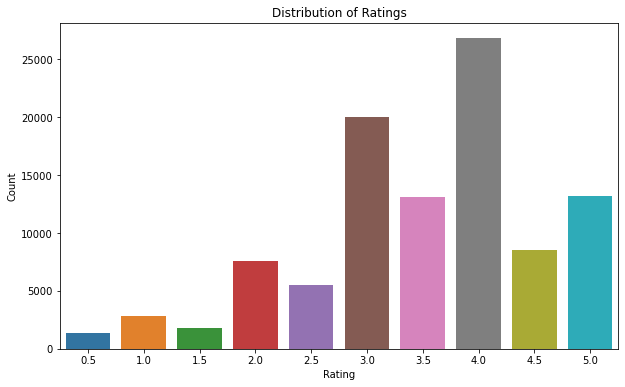

In [117]:
# Visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings_data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

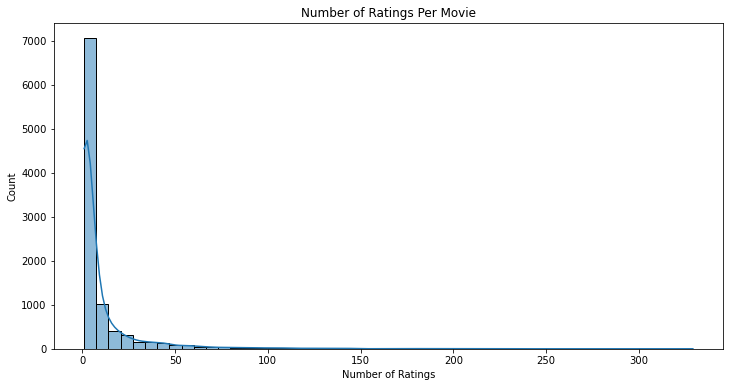

In [118]:
# Visualize the number of ratings per movie
plt.figure(figsize=(12, 6))
ratings_per_movie = ratings_data.groupby('movieId')['rating'].count()
sns.histplot(ratings_per_movie, bins=50, kde=True)
plt.title('Number of Ratings Per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

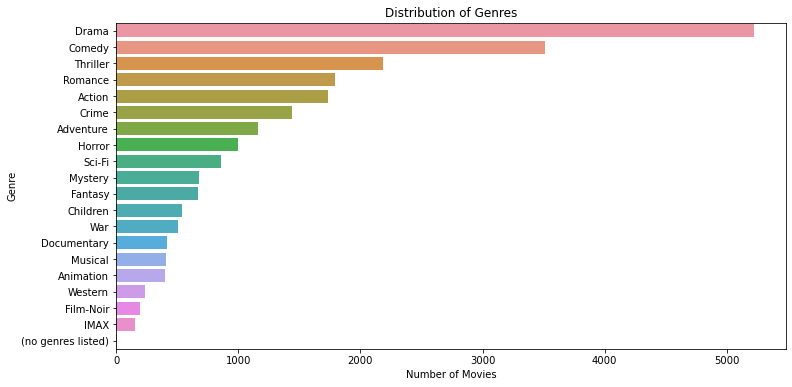

In [120]:
# Visualize the genres distribution
plt.figure(figsize=(12, 6))
genres_count = movies_data['genres'].str.split('|', expand=True).stack().value_counts()
sns.barplot(x=genres_count.values, y=genres_count.index)
plt.title('Distribution of Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

In [6]:
n_ratings = len(ratings_data)
n_movies = ratings_data['movieId'].nunique()
n_users = ratings_data['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of users:{n_users}")

Number of ratings: 100836
Number of unique movieId's: 9724
Number of users:610


In [7]:
df = ratings_data.pivot(index='movieId',columns='userId',values='rating')
df

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

userId
1      9492
2      9695
3      9685
4      9508
5      9680
       ... 
606    8609
607    9537
608    8893
609    9687
610    8422
Length: 610, dtype: int64

In [9]:
df.drop_duplicates()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Impute NaN with 0
df.fillna(0,inplace=True)
df.head()
df.shape

(9724, 610)

# Highest and Lowest Rating Movie

In [11]:
mean_rating = ratings_data.groupby('movieId')[['rating']].mean()
lowest_rated = mean_rating['rating'].idxmin()
movies_data.loc[movies_data['movieId'] == lowest_rated]

,movieId,title,genres
2851,3604,Gypsy (1962),Musical


In [12]:
highest_rated = mean_rating['rating'].idxmax()
movies_data.loc[movies_data['movieId'] == highest_rated]

,movieId,title,genres
49,53,Lamerica (1994),Adventure|Drama


In [13]:
ratings_data[ratings_data['movieId']==highest_rated]

,userId,movieId,rating,timestamp
13368,85,53,5.0,889468268
96115,603,53,5.0,963180003


In [14]:
movies_data['genres'].value_counts()

Drama                                        1385
Comedy                                        826
Comedy|Drama                                  465
Drama|Romance                                 421
Comedy|Romance                                363
                                             ... 
Animation|Children|Comedy|Musical|Western       1
Action|Adventure|Children|Comedy|Mystery        1
Action|Comedy|Crime|Drama|Horror|Thriller       1
Adventure|Drama|Romance|Thriller|War            1
Action|Fantasy|Mystery                          1
Name: genres, Length: 938, dtype: int64

In [15]:
genres_split=movies_data['genres'].str.split('|')[0]
genres_split

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

In [33]:
from sklearn.neighbors import NearestNeighbors

# Create a user-movie matrix (replace NaN with zeros)
user_movie_matrix = ratings_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Convert the user-movie matrix to a NumPy array
R = user_movie_matrix.values

# Create a Nearest Neighbors model

In [ ]:
knn = NearestNeighbors(n_neighbors=10, metric='cosine', algorithm='brute')
knn.fit(R)

In [43]:
def get_movie_recommendation(movie_name):
    # Define the number of movies to recommend
    n_movies_to_recommend = 10
    
    # Filter movies_data to find movies containing the input movie_name
    movie_list = movies_data[movies_data['title'].str.contains(movie_name)]
    
    # Check if there are movies in the list
    if len(movie_list):
        # Get the movieId of the first movie in the list
        movie_idx = movie_list.iloc[0]['movieId']
        
        # Get the column index of the movie in the user-movie matrix
        movie_idx = user_movie_matrix.columns.get_loc(movie_idx)
        
        # Find the nearest neighbors to the chosen movie using k-Nearest Neighbors
        distances, indices = knn.kneighbors([R[movie_idx]], n_neighbors=n_movies_to_recommend+1)
        
        # Combine indices and distances into pairs, sort by distance in reverse order, and select all except the first element
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
        
        # Initialize an empty list to store recommended movie details
        recommend_frame = []
        
        # Iterate through recommended movie indices and distances
        for val in rec_movie_indices:
            # Get the index of the recommended movie
            movie_idx = val[0]
            
            # Find the title of the recommended movie using its movieId
            title = movies_data[movies_data['movieId'] == user_movie_matrix.columns[movie_idx]]['title'].values[0]
            
            # Add movie details (title and distance) to the recommendation list
            recommend_frame.append({'Title': title, 'Distance': val[1]})
        
        # Create a DataFrame from the recommendation list with indices ranging from 1 movies to n_movies_to_recommend 
        df = pd.DataFrame(recommend_frame, index=range(1, n_movies_to_recommend+1))
        
        # Return the recommendation DataFrame
        return df
    else:
        # Return a message if no movies match the input movie_name
        return "No movies found"

# Recommendations for a specific movie

In [44]:
movie_name = "Star Wars"
recommendations = get_movie_recommendation(movie_name)
print(recommendations)

                                         Title  Distance
1                          Crimson Tide (1995)  0.793303
2                          Phantom, The (1996)  0.793041
3                            Underneath (1995)  0.791310
4                            Pocahontas (1995)  0.786529
5                           Underground (1995)  0.783917
6         Ready to Wear (Pret-A-Porter) (1994)  0.781906
7                          Exit to Eden (1994)  0.770667
8                             Pinocchio (1940)  0.761456
9   Ghost in the Shell (Kôkaku kidôtai) (1995)  0.752677
10       Ace Ventura: When Nature Calls (1995)  0.752311
